In [1]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.2.0-rc4
Running on TPU  ['10.75.140.18:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.75.140.18:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.75.140.18:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


# New Section

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from glob import glob
import tensorflow as tf
import tensorflow.keras as keras
from keras.regularizers import l1,l2
from keras.models import Sequential
from keras.layers import Dropout , BatchNormalization , Flatten , MaxPooling2D , Activation , Dense , Conv2D , InputLayer , MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image

Using TensorFlow backend.


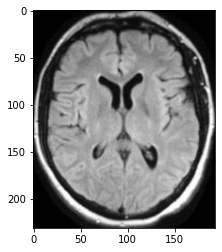

In [0]:
DATADIR_train = '/content/drive/My Drive/braintumor/data/cropped_images/train'
CATEGORIES= ['NO','YES']
 
for category in CATEGORIES:
    path = os.path.join(DATADIR_train,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))#cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array , cmap='gray')
        break
    break 

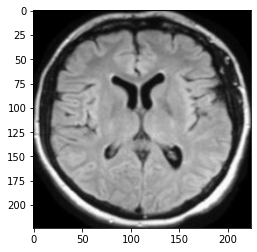

In [0]:
# to normalise the data (images)
IMG_SIZE=224
new_array = cv2.resize(img_array , (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array , cmap='gray')
plt.show()

In [0]:
from keras.optimizers import RMSprop,Adam

In [0]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/braintumor_newdata/newdata/TRAIN_CROP'
valid_path = '/content/drive/My Drive/braintumor_newdata/newdata/VAL_CROP'

weights = "/content/drive/My Drive/braintumor/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights=weights, include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False 
  # useful for getting number of classes
folders = glob('/content/drive/My Drive/braintumor/data/cropped_images/train/*')
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
x = Dropout(0.5)(x)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(1, activation='sigmoid')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use

model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0003, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), metrics=["accuracy"])


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
def preprocess_imgs(set_name, img_size):
    set_new = []
    for img in set_name:
        img = cv2.resize(
            img,
            dsize=img_size,
            interpolation=cv2.INTER_CUBIC
        )
        set_new.append(preprocess_input(img))
    return np.array(set_new)

In [0]:
from keras.preprocessing.image import ImageDataGenerator



train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True,
    # vertical_flip=True,
    preprocessing_function=preprocess_input
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/braintumor_newdata/newdata/TRAIN_CROP',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 color_mode='rgb',
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/braintumor_newdata/newdata/VAL_CROP',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            color_mode='rgb',
                                            class_mode = 'binary')

Found 193 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [0]:
from keras.callbacks import EarlyStopping

In [0]:
EPOCHS = 10
earlystop = EarlyStopping(
    monitor='val_acc', 
    mode='max',
    patience=5
)

VGG16_history = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=EPOCHS,
  steps_per_epoch=50,
  validation_steps=25,
  callbacks=[earlystop])

Epoch 1/10
 2/50 [>.............................] - ETA: 20:14 - loss: 6.4022 - accuracy: 0.6094

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2 could not be retrieved. It could be because a worker has died.
  UserWarning)


50/50 [==============================] - 183s 4s/step - loss: 2.9889 - accuracy: 0.6923 - val_loss: 0.9465 - val_accuracy: 0.8608
Epoch 2/10


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50/50 [==============================] - 38s 756ms/step - loss: 1.8922 - accuracy: 0.7921 - val_loss: 2.0100e-04 - val_accuracy: 0.8997
Epoch 3/10
50/50 [==============================] - 36s 722ms/step - loss: 1.3714 - accuracy: 0.8330 - val_loss: 0.4738 - val_accuracy: 0.8639
Epoch 4/10
50/50 [==============================] - 37s 730ms/step - loss: 1.1265 - accuracy: 0.8742 - val_loss: 1.0411 - val_accuracy: 0.8560
Epoch 5/10
50/50 [==============================] - 37s 732ms/step - loss: 0.7273 - accuracy: 0.9061 - val_loss: 1.1557 - val_accuracy: 0.8987
Epoch 6/10
50/50 [==============================] - 36s 730ms/step - loss: 0.8814 - accuracy: 0.8959 - val_loss: 1.5227 - val_accuracy: 0.8608
Epoch 7/10
50/50 [==============================] - 37s 735ms/step - loss: 0.6994 - accuracy: 0.9103 - val_loss: 3.4947 - val_accuracy: 0.8180
Epoch 8/10
50/50 [==============================] - 37s 733ms/step - loss: 0.6848 - accuracy: 0.9082 - val_loss: 2.4686 - val_accuracy: 0.8819
Epoch 

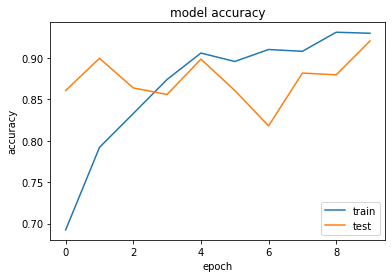

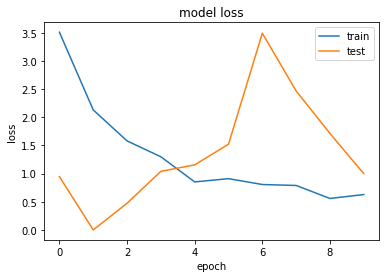

In [0]:
plt.plot(VGG16_history.history['accuracy'])
plt.plot(VGG16_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
 

plt.plot(VGG16_history.history['loss'])
plt.plot(VGG16_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show() 

In [0]:
model.save("brainvgg_10epoch.h5")

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [0]:

earlystop = EarlyStopping(
    monitor='val_acc', 
    mode='max',
    patience=5
)
VGG16_history_30epoch = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=50,
  validation_steps=25,
  callbacks=[earlystop])



Epoch 1/30
50/50 [==============================] - 38s 755ms/step - loss: 3.7735 - accuracy: 0.6978 - val_loss: 1.9177 - val_accuracy: 0.8196
Epoch 2/30


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50/50 [==============================] - 36s 722ms/step - loss: 1.7859 - accuracy: 0.8077 - val_loss: 1.4122 - val_accuracy: 0.9013
Epoch 3/30
50/50 [==============================] - 37s 749ms/step - loss: 1.7462 - accuracy: 0.8586 - val_loss: 5.3077 - val_accuracy: 0.7421
Epoch 4/30
50/50 [==============================] - 36s 711ms/step - loss: 0.8537 - accuracy: 0.8950 - val_loss: 0.4615 - val_accuracy: 0.8641
Epoch 5/30
50/50 [==============================] - 37s 741ms/step - loss: 0.5741 - accuracy: 0.9194 - val_loss: 0.8526 - val_accuracy: 0.8623
Epoch 6/30
50/50 [==============================] - 36s 718ms/step - loss: 0.7682 - accuracy: 0.9164 - val_loss: 1.6989 - val_accuracy: 0.8576
Epoch 7/30
50/50 [==============================] - 38s 753ms/step - loss: 0.4876 - accuracy: 0.9270 - val_loss: 0.6087 - val_accuracy: 0.9225
Epoch 8/30
50/50 [==============================] - 36s 720ms/step - loss: 0.4327 - accuracy: 0.9349 - val_loss: 0.1269 - val_accuracy: 0.8754
Epoch 9/30

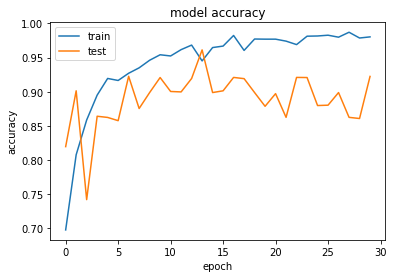

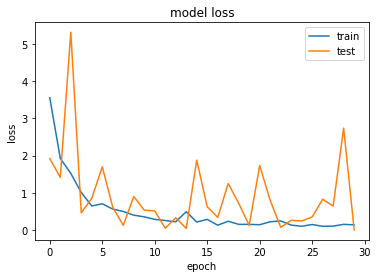

In [0]:
plt.plot(VGG16_history_30epoch.history['accuracy'])
plt.plot(VGG16_history_30epoch.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
 

plt.plot(VGG16_history_30epoch.history['loss'])
plt.plot(VGG16_history_30epoch.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show() 

In [0]:
model.save("braintumor_vgg30epoch.h5")

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [0]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

In [0]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/braintumor_newdata/newdata/TRAIN_CROP'
valid_path = '/content/drive/My Drive/braintumor_newdata/newdata/VAL_CROP'

weights = "/content/drive/My Drive/braintumor/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights=weights, include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False 
  # useful for getting number of classes
folders = glob('/content/drive/My Drive/braintumor/data/cropped_images/train/*')
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
x = Dropout(0.5)(x)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(1, activation='sigmoid')(x)

# create a model object
model1000 = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model1000.summary()

# tell the model what cost and optimization method to use
initial_learning_rate = 0.0001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=70,
    decay_rate=0.96,
    staircase=True)
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule,epsilon=0.001)

model1000.compile(loss='binary_crossentropy', metrics=METRICS,optimizer=optimizer)
# keras.optimizers.Adam(lr=0.0003, beta_1=0.9, beta_2=0.999, epsilon=0.001, decay=0.0, amsgrad=False), metrics=["accuracy"])


Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0  

In [0]:
from keras.preprocessing.image import ImageDataGenerator



train_datagen = ImageDataGenerator(
    rotation_range=15,
    shear_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/braintumor_newdata/newdata/TRAIN_CROP',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory('/content/drive/My Drive/braintumor_newdata/newdata/VAL_CROP',
                                            target_size = (224, 224),
                                            batch_size = 50,
                                      
                                            class_mode = 'binary')

Found 193 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [0]:
earlystop = EarlyStopping(
    monitor='val_loss', 
    mode='min',
    patience=50,restore_best_weights=True)

VGG16_history_1000epoch = model1000.fit_generator(
  training_set,
  validation_data=validation_set,
  epochs=1000,
  steps_per_epoch=8,
  validation_steps=1,
  callbacks=[earlystop],verbose=2)

Epoch 1/1000
 - 5s - loss: 0.8842 - accuracy: 0.4278 - val_loss: 0.7279 - val_accuracy: 0.6200
Epoch 2/1000
 - 5s - loss: 0.7110 - accuracy: 0.5644 - val_loss: 0.7636 - val_accuracy: 0.6200
Epoch 3/1000
 - 5s - loss: 0.7175 - accuracy: 0.6016 - val_loss: 0.6569 - val_accuracy: 0.6200
Epoch 4/1000
 - 4s - loss: 0.7847 - accuracy: 0.5876 - val_loss: 0.6247 - val_accuracy: 0.6800
Epoch 5/1000
 - 5s - loss: 0.6940 - accuracy: 0.5956 - val_loss: 0.6045 - val_accuracy: 0.6600
Epoch 6/1000
 - 5s - loss: 0.6516 - accuracy: 0.6089 - val_loss: 0.6039 - val_accuracy: 0.6200
Epoch 7/1000
 - 5s - loss: 0.6752 - accuracy: 0.6222 - val_loss: 0.6129 - val_accuracy: 0.6200
Epoch 8/1000
 - 5s - loss: 0.6443 - accuracy: 0.6533 - val_loss: 0.5765 - val_accuracy: 0.6600
Epoch 9/1000
 - 5s - loss: 0.5572 - accuracy: 0.6711 - val_loss: 0.5522 - val_accuracy: 0.6800
Epoch 10/1000
 - 5s - loss: 0.5883 - accuracy: 0.6578 - val_loss: 0.5408 - val_accuracy: 0.6800
Epoch 11/1000
 - 5s - loss: 0.5917 - accuracy: 0.

In [0]:
model1000.evaluate(validation_set)

1/1 [==============================] - 1s 1s/step


[0.2918214797973633, 0.8999999761581421]

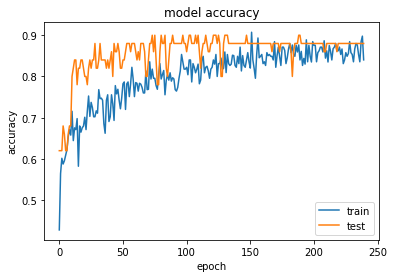

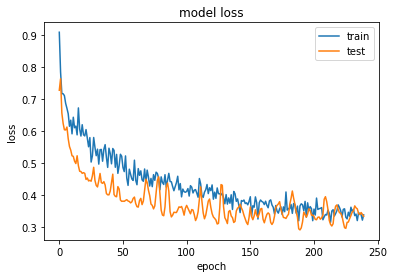

In [0]:
plt.plot(VGG16_history_1000epoch.history['accuracy'])
plt.plot(VGG16_history_1000epoch.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
 

plt.plot(VGG16_history_1000epoch.history['loss'])
plt.plot(VGG16_history_1000epoch.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [0]:
model1000.save("brain_vgg1000epoch_.h5")

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [0]:
imagename = "/content/7.jpg"
test_image = image.load_img(imagename,target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = np.round(model1000.predict(test_image))


In [0]:
result

array([[1.]], dtype=float32)

In [0]:
from keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)


test_set =  val_datagen.flow_from_directory('/content/drive/My Drive/braintumor_newdata/newdata/TEST_CROP',
                                            target_size = (224, 224),class_mode = 'binary')
  # print(i)
  # break
  # val_img.append()
  
  

Found 10 images belonging to 2 classes.


In [0]:
test_set.class_indices

{'NO': 0, 'YES': 1}

In [0]:
model1000.evaluate(test_set)

1/1 [==============================] - 0s 269ms/step


[0.30812981724739075, 0.8999999761581421]

In [0]:
y_pred = model1000.predict(test_set)

In [0]:
y_pred

array([[0.7637595 ],
       [0.20012486],
       [0.07093322],
       [0.96933824],
       [0.77645457],
       [0.5836555 ],
       [0.6924945 ],
       [0.28220606],
       [0.20294288],
       [0.6513789 ]], dtype=float32)

In [0]:
test_confusion_matrix = keras.metrics.confusion_matrix(np.array(val_set), y_pred)

true_negatives = test_confusion_matrix[0][0]
false_negatives = test_confusion_matrix[1][0]
true_positives = test_confusion_matrix[1][1]
false_positives = test_confusion_matrix[0][1]

In [0]:
from keras.applications.resnet_v2 import ResNet101V2

In [62]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/braintumor_newdata/newdata/TRAIN_CROP'
valid_path = '/content/drive/My Drive/braintumor_newdata/newdata/VAL_CROP'

# add preprocessing layer to the front of VGG
resnet = ResNet101V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in resnet.layers:
  layer.trainable = False 
  # useful for getting number of classes
# folders = glob('/content/drive/My Drive/braintumor/data/cropped_images/train/*')
  

# our layers - you can add more if you want
x = Flatten()(resnet.output)
x = Dropout(0.5)(x)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(1, activation='sigmoid')(x)

# create a model object
resmodel = Model(inputs=resnet.input, outputs=prediction)

# view the structure of the model
resmodel.summary()

# tell the model what cost and optimization method to use
initial_learning_rate = 0.001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=50,
    decay_rate=0.96,
    staircase=True)
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule,epsilon=0.001)

# tell the model what cost and optimization method to use
resmodel.compile(loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)



from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    vertical_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/braintumor_newdata/newdata/TRAIN_CROP',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 color_mode='rgb',
                                                 class_mode = 'binary')

validation_set = test_datagen.flow_from_directory('/content/drive/My Drive/braintumor_newdata/newdata/VAL_CROP',
                                            target_size = (224, 224),
                                            batch_size = 50,
                                            color_mode='rgb',
                                            class_mode = 'binary')


171319296/171317808 [==============================] - 2s 0us/step
Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_14[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
________________________

In [0]:
from keras.callbacks import EarlyStopping

In [64]:
earlystop = EarlyStopping(
    monitor='val_loss', 
    mode='min',
    patience=50,restore_best_weights=True)

resnet50_history_1000epoch = resmodel.fit_generator(
  training_set,
  validation_data=validation_set,
  epochs=1000,
  steps_per_epoch=8,
  validation_steps=1,
  callbacks=[earlystop],verbose=2)

Epoch 1/1000
 - 10s - loss: 1.1667 - accuracy: 0.5928 - val_loss: 0.5395 - val_accuracy: 0.8000
Epoch 2/1000
 - 7s - loss: 0.6214 - accuracy: 0.7812 - val_loss: 0.6169 - val_accuracy: 0.8400
Epoch 3/1000
 - 6s - loss: 0.3682 - accuracy: 0.8660 - val_loss: 1.7669 - val_accuracy: 0.7200
Epoch 4/1000
 - 7s - loss: 0.5382 - accuracy: 0.8477 - val_loss: 1.3015 - val_accuracy: 0.8000
Epoch 5/1000
 - 7s - loss: 0.4425 - accuracy: 0.8800 - val_loss: 1.5355 - val_accuracy: 0.7600
Epoch 6/1000
 - 6s - loss: 0.2274 - accuracy: 0.9124 - val_loss: 1.5850 - val_accuracy: 0.7800
Epoch 7/1000
 - 7s - loss: 0.8367 - accuracy: 0.8800 - val_loss: 0.7774 - val_accuracy: 0.8400
Epoch 8/1000
 - 7s - loss: 0.6397 - accuracy: 0.8489 - val_loss: 1.9438 - val_accuracy: 0.7400
Epoch 9/1000
 - 7s - loss: 0.7039 - accuracy: 0.8978 - val_loss: 0.7733 - val_accuracy: 0.9000
Epoch 10/1000
 - 6s - loss: 1.4181 - accuracy: 0.8814 - val_loss: 1.7678 - val_accuracy: 0.7800
Epoch 11/1000
 - 7s - loss: 0.4642 - accuracy: 0

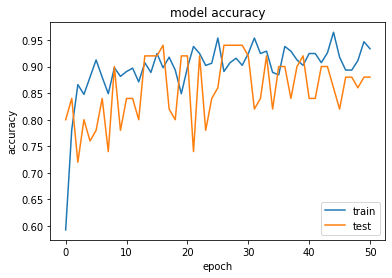

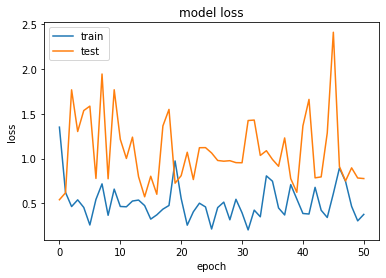

In [66]:
plt.plot(resnet50_history_1000epoch.history['accuracy'])
plt.plot(resnet50_history_1000epoch.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
 

plt.plot(resnet50_history_1000epoch.history['loss'])
plt.plot(resnet50_history_1000epoch.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [67]:
resmodel.save("resnet101_new.h5")

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [0]:
from keras.applications.inception_v3 import InceptionV3

In [48]:
IMAGE_SIZE = [229, 229]

train_path = '/content/drive/My Drive/braintumor_newdata/newdata/TRAIN_CROP'
valid_path = '/content/drive/My Drive/braintumor_newdata/newdata/VAL_CROP'

# add preprocessing layer to the front of VGG
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in inception.layers:
  layer.trainable = False 
  # useful for getting number of classes
# folders = glob('/content/drive/My Drive/braintumor/data/cropped_images/train/*')
  

# our layers - you can add more if you want
x = Flatten()(inception.output)
x = Dropout(0.5)(x)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(1, activation='sigmoid')(x)

# create a model object
inceptionmodel = Model(inputs=inception.input, outputs=prediction)

# view the structure of the model
inceptionmodel.summary()

# tell the model what cost and optimization method to use
inceptionmodel.compile(loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    # brightness_range=[0.5, 1.5],
    horizontal_flip=True,
    vertical_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/braintumor_newdata/newdata/TRAIN_CROP',
                                                 target_size = (229, 229),
                                                 batch_size = 32,
                                                 color_mode='rgb',
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/braintumor_newdata/newdata/VAL_CROP',
                                            target_size = (229, 229),
                                            batch_size = 50,
                                            color_mode='rgb',
                                            class_mode = 'binary')

EPOCHS = 1000
earlystop = EarlyStopping(
    monitor='val_loss', 
    mode='min',
    patience=50,restore_best_weights=True)


inceptiononly_history = inceptionmodel.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=EPOCHS,
  steps_per_epoch=8,
  validation_steps=1,
  callbacks=[earlystop],verbose=2)



Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 229, 229, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1407 (Conv2D)            (None, 114, 114, 32) 864         input_11[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1407 (Batch (None, 114, 114, 32) 96          conv2d_1407[0][0]                
__________________________________________________________________________________________________
activation_1505 (Activation)    (None, 114, 114, 32) 0           batch_normalization_1407[0][0]   
___________________________________________________________________________________________

In [50]:
inceptionmodel.save("inceptionv3_new.h5")

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


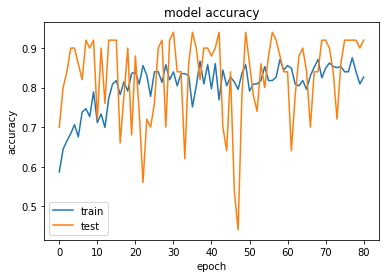

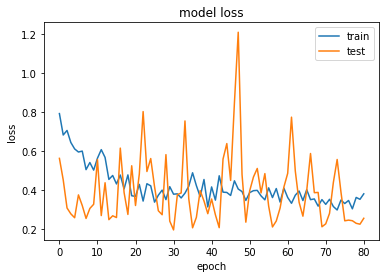

In [49]:
plt.plot(inceptiononly_history.history['accuracy'])
plt.plot(inceptiononly_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
 

plt.plot(inceptiononly_history.history['loss'])
plt.plot(inceptiononly_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [0]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2

In [0]:
from keras import optimizers
from keras.callbacks import EarlyStopping

In [44]:
IMAGE_SIZE = [229, 229]

train_path = '/content/drive/My Drive/braintumor_newdata/newdata/TRAIN_CROP'
valid_path = '/content/drive/My Drive/braintumor_newdata/newdata/VAL_CROP'

# add preprocessing layer to the front of VGG
inception = InceptionResNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in inception.layers:
  layer.trainable = False 
  # useful for getting number of classes
# folders = glob('/content/drive/My Drive/braintumor/data/cropped_images/train/*')
  

# our layers - you can add more if you want
x = Flatten()(inception.output)
x = Dropout(0.5)(x)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(1, activation='sigmoid')(x)

# create a model object
inceptionresmodel = Model(inputs=inception.input, outputs=prediction)

# view the structure of the model
inceptionresmodel.summary()

initial_learning_rate = 0.0001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=70,
    decay_rate=0.96,
    staircase=True)
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule,epsilon=0.001)

# tell the model what cost and optimization method to use
inceptionresmodel.compile(loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    # brightness_range=[0.5, 1.5],
    horizontal_flip=True,
    vertical_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/braintumor_newdata/newdata/TRAIN_CROP',
                                                 target_size = (229, 229),
                                                 batch_size = 32,
                                                 color_mode='rgb',
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/braintumor_newdata/newdata/VAL_CROP',
                                            target_size = (229, 229),
                                            batch_size = 50,
                                            color_mode='rgb',
                                            class_mode = 'binary')

EPOCHS = 1000
earlystop = EarlyStopping(
    monitor='val_loss', 
    mode='min',
    patience=50,restore_best_weights=True)


inceptionresnet_history = inceptionresmodel.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=EPOCHS,
  steps_per_epoch=8,
  validation_steps=1,
  callbacks=[earlystop],verbose=2)



Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 229, 229, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1204 (Conv2D)            (None, 114, 114, 32) 864         input_10[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1204 (Batch (None, 114, 114, 32) 96          conv2d_1204[0][0]                
__________________________________________________________________________________________________
activation_1302 (Activation)    (None, 114, 114, 32) 0           batch_normalization_1204[0][0]   
___________________________________________________________________________________________

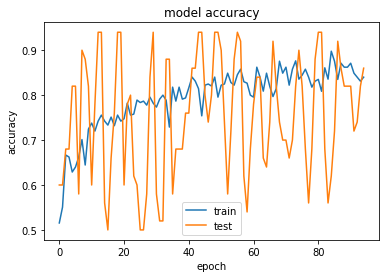

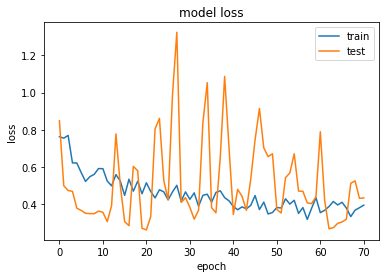

In [45]:
plt.plot(inceptionresnet_history.history['accuracy'])
plt.plot(inceptionresnet_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
 

plt.plot(inception_history.history['loss'])
plt.plot(inception_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [46]:
inceptionresmodel.save("inceptionresnet_new.h5")

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [0]:
myaccuracylist = []


In [0]:
myaccuracylist.append(resnet50_history_1000epoch)
myaccuracylist.append(inceptionresnet_history)
myaccuracylist.append()

In [0]:
# !pip install efficientnet
from efficientnet.keras import EfficientNetB4

In [0]:

efficient_net_custom_model = output_custom_model(EfficientNetB4)

In [71]:

IMAGE_SIZE = [229, 229]

train_path = '/content/drive/My Drive/braintumor_newdata/newdata/TRAIN_CROP'
valid_path = '/content/drive/My Drive/braintumor_newdata/newdata/VAL_CROP'

# add preprocessing layer to the front of VGG
efficient = EfficientNetB4(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in efficient.layers:
  layer.trainable = False 
  # useful for getting number of classes
# folders = glob('/content/drive/My Drive/braintumor/data/cropped_images/train/*')
  

# our layers - you can add more if you want
x = Flatten()(efficient.output)
x = Dropout(0.5)(x)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(1, activation='sigmoid')(x)

# create a model object
effmodel = Model(inputs=efficient.input, outputs=prediction)

# view the structure of the model
effmodel.summary()

initial_learning_rate = 0.0001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=70,
    decay_rate=0.96,
    staircase=True)
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule,epsilon=0.001)

# tell the model what cost and optimization method to use
effmodel.compile(loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    # brightness_range=[0.5, 1.5],
    horizontal_flip=True,
    vertical_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/braintumor_newdata/newdata/TRAIN_CROP',
                                                 target_size = (229, 229),
                                                 batch_size = 32,
                                                 color_mode='rgb',
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/braintumor_newdata/newdata/VAL_CROP',
                                            target_size = (229, 229),
                                            batch_size = 50,
                                            color_mode='rgb',
                                            class_mode = 'binary')

EPOCHS = 1000
earlystop = EarlyStopping(
    monitor='val_loss', 
    mode='min',
    patience=50,restore_best_weights=True)


eff_history = effmodel.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=EPOCHS,
  steps_per_epoch=8,
  validation_steps=1,
  callbacks=[earlystop],verbose=2)



71892992/71892840 [==============================] - 1s 0us/step
Model: "model_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           (None, 229, 229, 3)  0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 115, 115, 48) 1296        input_15[0][0]                   
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 115, 115, 48) 192         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 115, 115, 48) 0           stem_bn[0][0]                    
__________________________

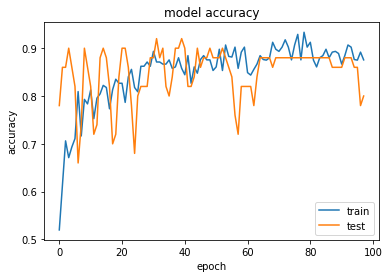

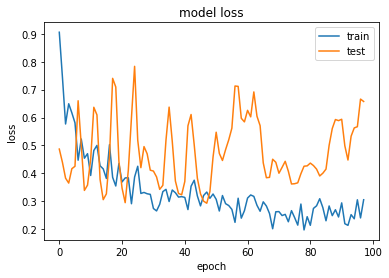

In [72]:
plt.plot(eff_history.history['accuracy'])
plt.plot(eff_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
 

plt.plot(eff_history.history['loss'])
plt.plot(eff_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [73]:
effmodel.save("efficientnet.h5")

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '
